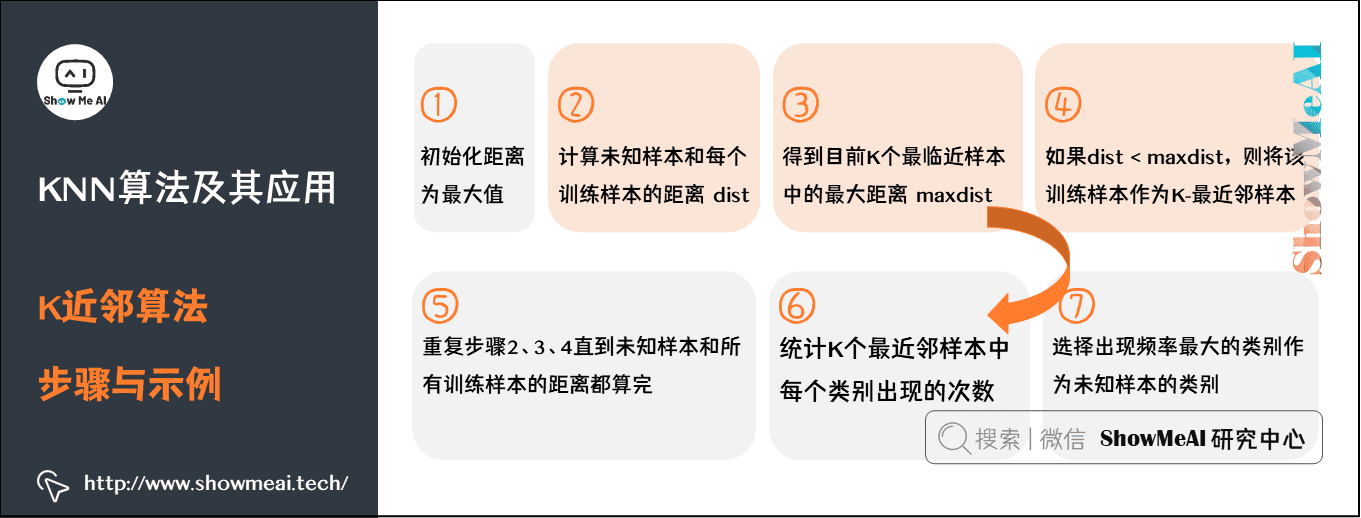

In [52]:
import numpy as np
import pandas as pd
from scipy.spatial import distance#用于计算欧式距离
from sklearn.preprocessing import StandardScaler#用于对数据进行标准化操作
from sklearn.neighbors import KNeighborsRegressor#KNN算法
from sklearn.metrics import mean_squared_error#用于计算均方根误差

In [53]:
path='./data/rent_price.csv'
file=open(path,'r', encoding='gb18030',errors='ignore')
dc_listings=pd.read_csv(file)
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
dc_listings=dc_listings[features]
dc_listings

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,1.0,1.0,2.0,$160.00,1,1125,0
1,6,3.0,3.0,3.0,$350.00,2,30,65
2,1,1.0,2.0,1.0,$50.00,2,1125,1
3,2,1.0,1.0,1.0,$95.00,1,1125,0
4,4,1.0,1.0,1.0,$50.00,7,1125,0
...,...,...,...,...,...,...,...,...
3718,4,1.0,1.0,2.0,$135.00,3,60,19
3719,2,1.0,2.0,1.0,$79.00,3,365,36
3720,6,2.0,1.0,3.0,$275.00,2,2147483647,12
3721,2,1.0,1.0,1.0,$179.00,2,21,48


In [54]:
our_acc_value = 3
dc_listings['distance'] = np.abs(dc_listings.accommodates - our_acc_value)
dc_listings = dc_listings.sample(frac=1, random_state=0)
dc_listings = dc_listings.sort_values('distance')
dc_listings['price'] = dc_listings['price'].str.replace(r'[$,]', '', regex=True).astype(float)
dc_listings = dc_listings.dropna()
type(dc_listings.price[0]),dc_listings

(numpy.float64,
       accommodates  bedrooms  bathrooms  beds   price  minimum_nights  \
 2645             3       1.0        1.0   1.0    75.0               7   
 2825             3       3.0        2.0   2.0   120.0               1   
 2145             3       1.0        2.0   2.0    90.0               1   
 2541             3       1.0        1.0   1.0    50.0               1   
 3349             3       1.0        1.0   1.0   105.0               1   
 ...            ...       ...        ...   ...     ...             ...   
 763             16       1.0        1.0   1.0  1000.0               1   
 2560            16       1.0        1.0   2.0    60.0               3   
 1594            16      10.0        8.0  13.0  1250.0               3   
 1224            16       1.0        2.0   1.0   499.0               1   
 1596            16       5.0        3.5   5.0   299.0               3   
 
       maximum_nights  number_of_reviews  distance  
 2645             180                 24 

In [57]:
dc_listings[features]=StandardScaler().fit_transform(dc_listings[features])
normalized_listings=dc_listings
normalized_listings

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
2645,-0.097602,-0.249501,-0.439211,-0.546933,-0.536922,1.316824,-0.016601,0.304223,0
2825,-0.097602,2.129508,1.265170,0.297386,-0.209724,-0.341421,-0.016575,-0.516779,0
2145,-0.097602,-0.249501,1.265170,0.297386,-0.427856,-0.341421,-0.016575,1.364683,0
2541,-0.097602,-0.249501,-0.439211,-0.546933,-0.718699,-0.341421,-0.016575,-0.482571,0
3349,-0.097602,-0.249501,-0.439211,-0.546933,-0.318790,-0.341421,-0.016575,-0.277320,0
...,...,...,...,...,...,...,...,...,...
763,6.389693,-0.249501,-0.439211,-0.546933,6.188819,-0.341421,-0.016575,-0.516779,13
2560,6.389693,-0.249501,-0.439211,0.297386,-0.645988,0.211327,-0.016605,-0.516779,13
1594,6.389693,10.456040,11.491457,9.584890,8.006587,0.211327,-0.016575,-0.516779,13
1224,6.389693,-0.249501,1.265170,-0.546933,2.546012,-0.341421,-0.016575,-0.516779,13


In [58]:
#取得训练集和测试集
norm_train_df = normalized_listings[:2792]
norm_test_df = normalized_listings[2792:]

In [62]:
#scipy包distance模块计算欧式距离
first_listings = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listings = normalized_listings.iloc[20][['accommodates', 'bathrooms']]
#用python方法做多变量KNN模型
def predict_price_multivariate(new_listing_value, feature_columns):
    temp_df = norm_train_df
    #distance.cdist计算两个集合的距离
    temp_df['distance'] = distance.cdist(temp_df[feature_columns], [new_listing_value[feature_columns]])
    temp_df = temp_df.sort_values('distance')#temp_df按distance排序
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return predicted_price
cols = ['accommodates', 'bathrooms']
norm_test_df['predicted_price'] = norm_test_df[cols].apply(predict_price_multivariate, feature_columns=cols, axis=1)
norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price']) ** 2
mse = norm_test_df['squared_error'].mean()
rmse = mse ** (1/2)
print(rmse)
#利用sklearn完成KNN
col = ['accommodates', 'bedrooms']
knn = KNeighborsRegressor()
#将自变量和因变量放入模型训练，并用测试数据测试
knn.fit(norm_train_df[cols], norm_train_df['price'])
two_features_predictions = knn.predict(norm_test_df[cols])
#计算预测值与实际值的均方根误差
two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

      accommodates  bedrooms  bathrooms      beds     price  minimum_nights  \
2131     -1.095648 -0.249501  -0.439211 -0.546933 -0.827765       -0.341421   
1914     -1.095648 -0.249501  -0.439211 -0.546933 -0.776868        0.211327   
178      -1.095648 -0.249501  -0.439211 -0.546933 -0.427856       -0.341421   
1849     -1.095648 -0.249501  -0.439211 -0.546933 -0.609633       -0.341421   
585      -1.095648 -1.439006  -0.439211 -0.546933 -0.500567        0.211327   
...            ...       ...        ...       ...       ...             ...   
1797      0.401420  0.940003   2.969551  0.297386  0.590094        0.487701   
546       0.401420 -0.249501   2.969551  0.297386  0.662804        0.211327   
1706     -0.596625 -0.249501   3.821742 -0.546933 -0.173369       -0.341421   
1835     -0.097602 -0.249501   3.821742 -0.546933 -0.566007       -0.065047   
845       0.401420  3.319013   3.821742  1.986023  1.462622       -0.341421   

      maximum_nights  number_of_reviews  distance  

C:\Users\Admin\AppData\Local\Temp\ipykernel_10592\2911408088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_test_df['predicted_price'] = norm_test_df[cols].apply(predict_price_multivariate, feature_columns=cols, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10592\2911408088.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price']) ** 2


In [60]:
first_listings

accommodates   -0.097602
bathrooms      -0.439211
Name: 2645, dtype: float64

In [61]:
fifth_listings

accommodates   -0.097602
bathrooms      -0.439211
Name: 670, dtype: float64